# DS 3000 - Assignment 4

**Student Name**: Sydney Howard

**Date**: 01/26/25


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

#### 1.) Load the data directly from the url into a dataframe

In [1]:
# Importing Relevant Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data Into a Dataframe
admissions_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1aWQsq0fdL3SF-jyrVMpEAtHW9FFSF2xO')
admissions_df.head()

,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
0,2007,Albany,Crisis,Medical Managed Detoxification,Under 18,Heroin,4
1,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,All Others,2
2,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Other Opioids,6
3,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Heroin,132
4,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Alcohol,35


#### 2.) Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed) and perform at least one additional data preparation step. 

In [2]:
# Check the data types of the columns
print(admissions_df.dtypes)

#'Year' and 'Admissions' are already integer values.

# All columns considered categorical (fixed set of options) stored as categories
categorical_columns = ['County of Program Location', 'Program Category', 'Service Type', 
                       'Age Group', 'Primary Substance Group']
for col in categorical_columns:
    admissions_df[col] = admissions_df[col].astype('category')

# Additional data cleaning: Check for any missing values 
admissions_df = admissions_df.dropna()
missing_values = admissions_df.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Check the cleaned dataframe
print(admissions_df.dtypes)
(admissions_df.head())

Year                           int64
County of Program Location    object
Program Category              object
Service Type                  object
Age Group                     object
Primary Substance Group       object
Admissions                     int64
dtype: object
Missing values:
Year                          0
County of Program Location    0
Program Category              0
Service Type                  0
Age Group                     0
Primary Substance Group       0
Admissions                    0
dtype: int64
Year                             int64
County of Program Location    category
Program Category              category
Service Type                  category
Age Group                     category
Primary Substance Group       category
Admissions                       int64
dtype: object


,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
0,2007,Albany,Crisis,Medical Managed Detoxification,Under 18,Heroin,4
1,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,All Others,2
2,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Other Opioids,6
3,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Heroin,132
4,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Alcohol,35


#### 3.) Visualize the distribution of Age Groups, Program Category, Primary Substance Group, and Admissions. Ensure that you 1) choose an appropriate graph based on the type of data, and 2) use the appropriate function to aggregate the data. Explain each chart.

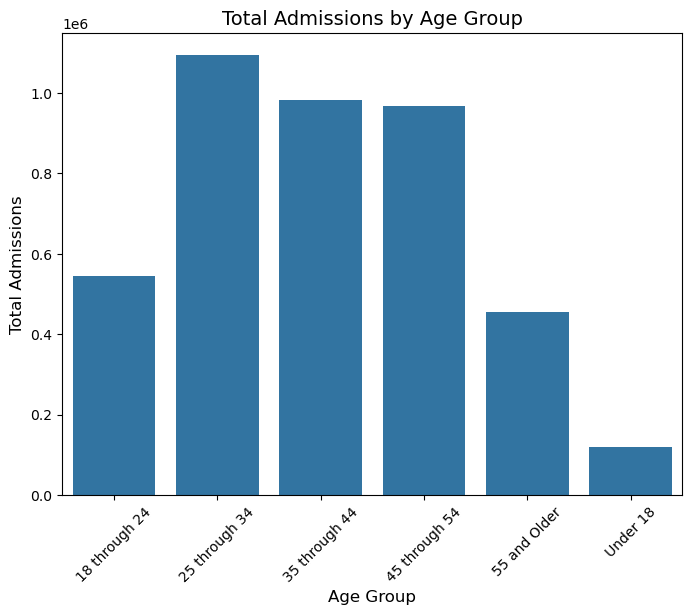

In [3]:
# 1. Distribution of Age Groups (Bar Chart)
plt.figure(figsize=(8, 6))
# Aggregate the Admissions column 
admissions_by_age = admissions_df.groupby('Age Group', observed=True)['Admissions'].sum().sort_values()
# Plot
sns.barplot(x=admissions_by_age.index, y=admissions_by_age.values)
plt.title('Total Admissions by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Admissions', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Explanation:** This bar chart depicts the count of records for each age group. This helps identify the most and least represented age groups in the dataset, with the most frequent age group being from 25 through 34 and the least frequently represented age group is under 18.

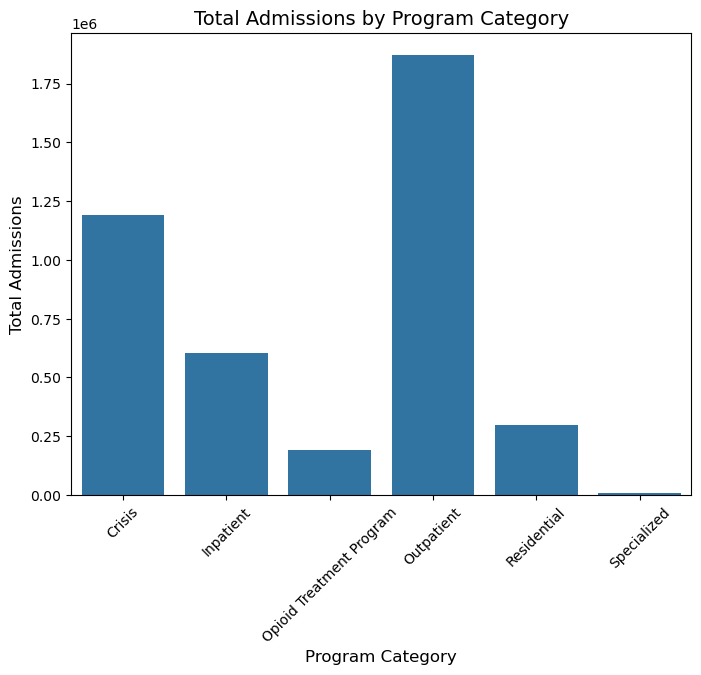

In [4]:
# 2. Distribution of Program Category (Bar Chart)
plt.figure(figsize=(8, 6))
# Aggregate the Admissions column 
admissions_by_program = admissions_df.groupby('Program Category', observed=True)['Admissions'].sum().sort_values(ascending=False)
# Plot
sns.barplot(x=admissions_by_program.index, y=admissions_by_program.values)
plt.title('Total Admissions by Program Category', fontsize=14)
plt.xlabel('Program Category', fontsize=12)
plt.ylabel('Total Admissions', fontsize=12)
plt.xticks(rotation=45)
plt.show()


**Explanation:** This bar chart displays the count of records for each program category. This highlights that the outpatient followed by the crisis program categories are the most common in the dataset. The least common program is specialized, which makes sense as each program is likely specific, and most patients likely fall into the broader categories.

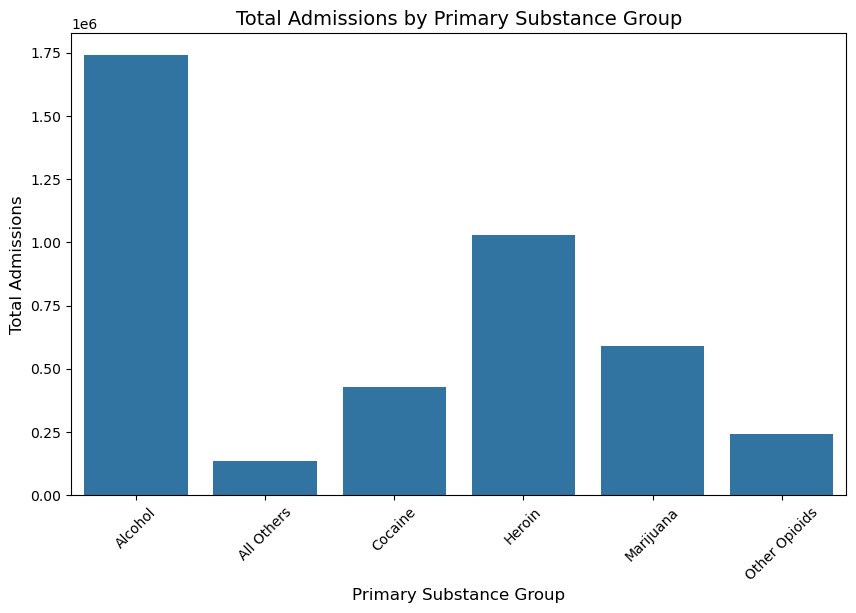

In [5]:
# 3. Distribution of Primary Substance Group (Bar Chart)
plt.figure(figsize=(10, 6))
# Aggregate the Admissions column 
admissions_by_substance = admissions_df.groupby('Primary Substance Group', observed=True)['Admissions'].sum().sort_values(ascending=False)
# Plot
sns.barplot(x=admissions_by_substance.index, y=admissions_by_substance.values)
plt.title('Total Admissions by Primary Substance Group', fontsize=14)
plt.xlabel('Primary Substance Group', fontsize=12)
plt.ylabel('Total Admissions', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Explanation:** This bar chart shows the count of records for each primary substance group. This visualization identifies the most frequently reported substances in the dataset, with alcohol being the most common. The least frequently recorded category is under "other". 

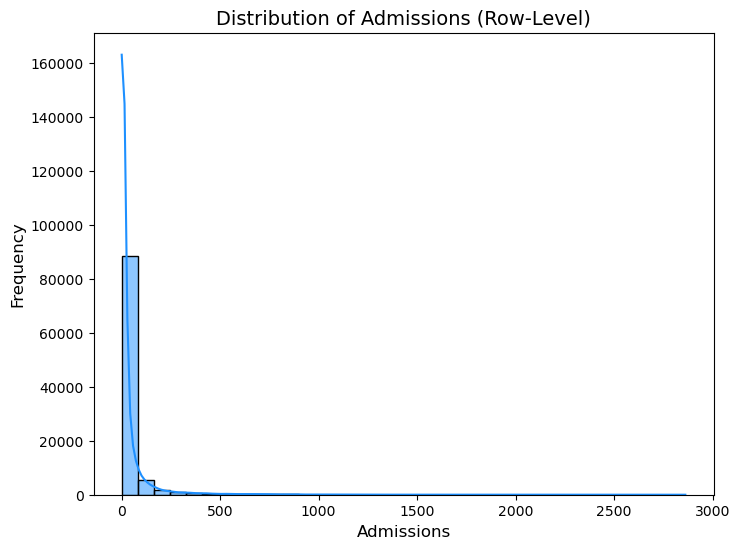

2861


In [6]:
# 4. Distribution of Admissions (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(admissions_df['Admissions'], bins=35, kde=True, color='dodgerblue')
plt.title('Distribution of Admissions (Row-Level)', fontsize=14)
plt.xlabel('Admissions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
print(admissions_df['Admissions'].max())

**Explanation:** This is a histogram representing the frequency of the number of admissions in each row of the data. The maximum amount of admissions in one row is 2861, but it's very clear that the most frequent number is 100 or less individuals. 

#### 4.) Develop a function named annualAdmissions(). This function will calculate the total reported admissions each year across the entire state of New York. Subsequently, display the results using a line chart and annotate the chart to indicate the year with the highest number of admissions. After which, Execute the function in a new cell. Explain the chart and discuss any patterns or trends that you have observed.

In [7]:
def annualAdmissions(data):
    """
    Calculate total reported admissions each year across new york 
    and plot a line chart with the year of the highest admissions annotated.
    
    Parameters:
    - dataframe with 'Year' and 'Admissions' columns
    
    Returns:
    - totals_by_year: df with years and their corresponding total admissions
    """
    # Grouping data by Year and aggregating Admissions
    totals_by_year = data.groupby('Year')['Admissions'].sum().reset_index()
    
    # Identifying the year with the highest admissions
    max_admissions = totals_by_year['Admissions'].max()
    max_year = totals_by_year.loc[totals_by_year['Admissions'] == max_admissions, 'Year'].iloc[0]
    
    # Plotting the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(totals_by_year['Year'], totals_by_year['Admissions'], marker='o', color='dodgerblue', label='Admissions')
    plt.title('Total Annual Admissions in New York', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Admissions', fontsize=12)
    plt.grid(alpha=0.3)
    plt.xticks(totals_by_year['Year'], rotation=45)
    plt.legend()
    
    # Annotating the year with the highest admissions
    plt.annotate(
        f'Highest: {max_admissions}',
        xy=(max_year, max_admissions),
        xytext=(max_year + 0.5, max_admissions + 500),
        arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
        fontsize=12,
        color='red'
    )
    
    # Display the plot
    plt.show()

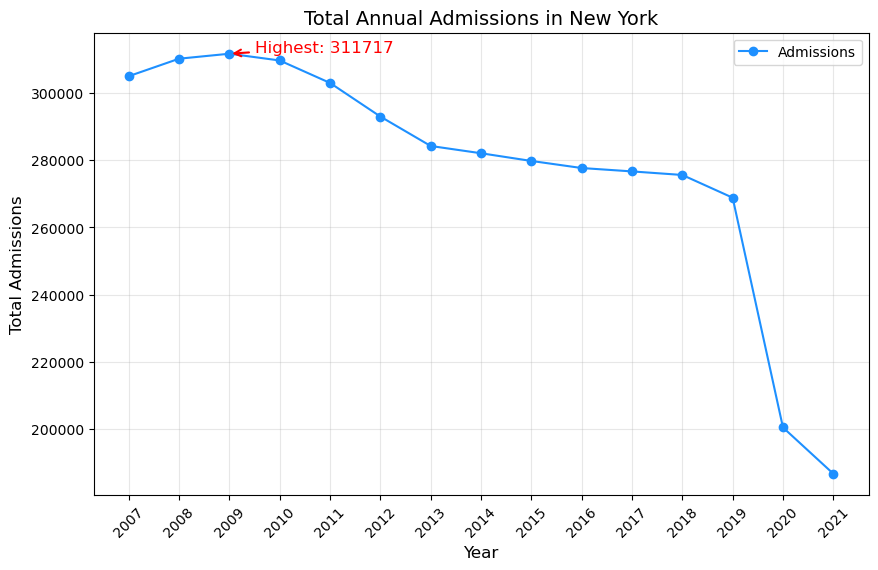

In [8]:
# Execute the function
totals_by_year = annualAdmissions(admissions_df)

**Explanation:** The chart visualizes the total reported admissions for each year across New York State. The year with the highest admissions is annotated for emphasis, allowing easy identification. There is a general decrease in total admissions over time, with the peak of admissions being in 2009 and declining every year since. From 2019 to 2020 there was a dramatic decrease, likely to outside factors such as the COVID-19 pandemic. The numbers of admissions fell even further at an all time low in 2021. 


#### 5.)  Develop a function named annualAdmissionsByCounty(year). This function will take a year as input, filter the data to identify all admissions for that specific year, and calculate the proportion of admissions by county. For instance, if the year is 2007, the function should filter the data for the specific year and compute the admissions as follows: county A 75%, county B 20%, and county C 2.5%, etc. The results should be displayed using a bar chart that highlights the top 10 counties. Execute the annualAdmissionsByCounty() function in a new code cell to visualize the data for the last 10 years within the data. Analyze the results and discuss any patterns or trends observed over this period.

In [9]:
def annualAdmissionsByCounty(year, data):
    """
    Filters data for a specific year and calculates the proportion of admissions by county.
    Displays a bar chart for the top 10 counties based on their proportions.
    
    Parameters:
    - year
    - dataframe with 'Year' and 'Admissions' columns
    """
    # Filter data for the specified year
    year_data = data[data['Year'] == year]
    
    if year_data.empty:
        print(f"No data available for the year {year}.")
        return
    
    # Group by county and calculate total admissions
    county_totals = year_data.groupby('County of Program Location', observed=True)['Admissions'].sum()
    
    # Calculate proportions
    total_admissions = county_totals.sum()
    proportions = (county_totals / total_admissions) * 100
    
    # Sort by proportion and get the top 10 counties
    top_counties = proportions.sort_values(ascending=False).head(10)
    
    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    top_counties.plot(kind='bar', color='dodgerblue')
    plt.title(f'Admissions Proportion by County in {year} (Top 10 Counties)', fontsize=14)
    plt.ylabel('Proportion (%)', fontsize=12)
    plt.xlabel('County', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45)
    plt.show()

Year: 2012


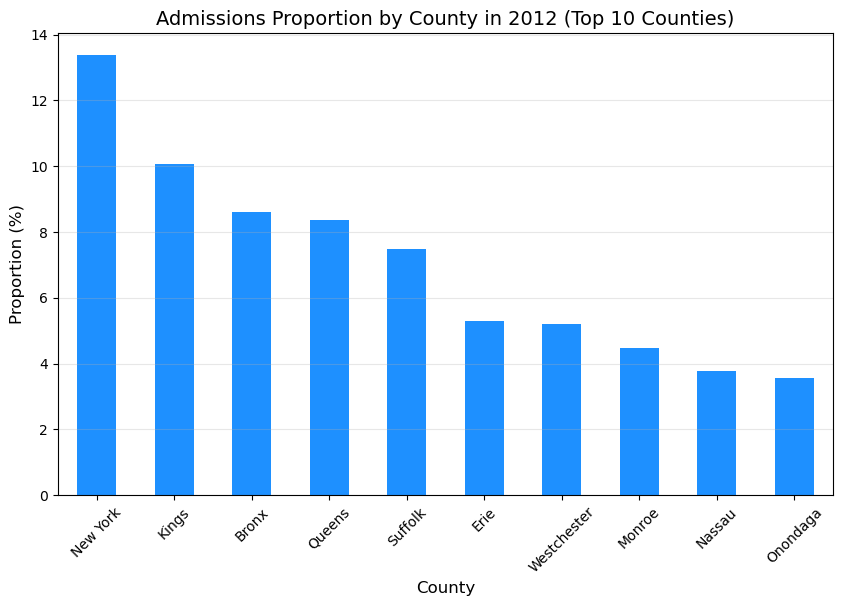

Year: 2013


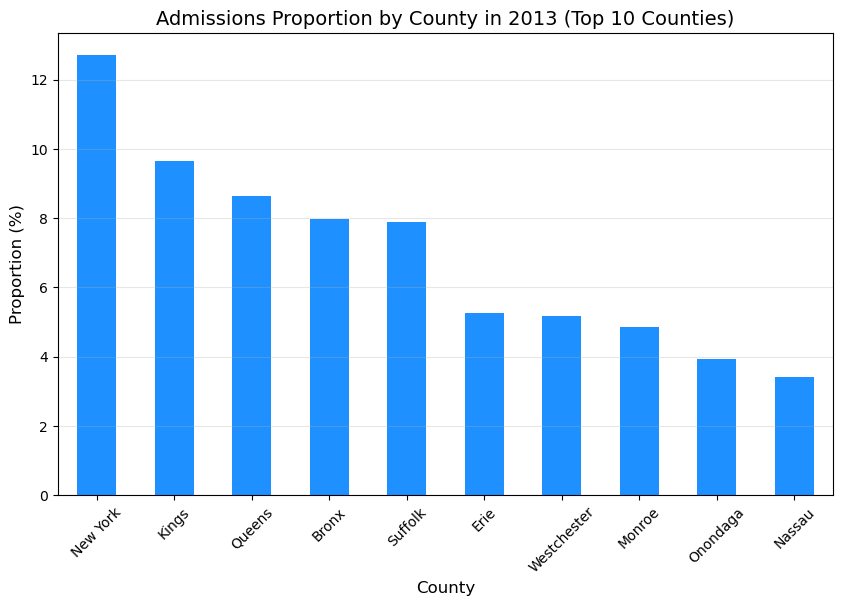

Year: 2014


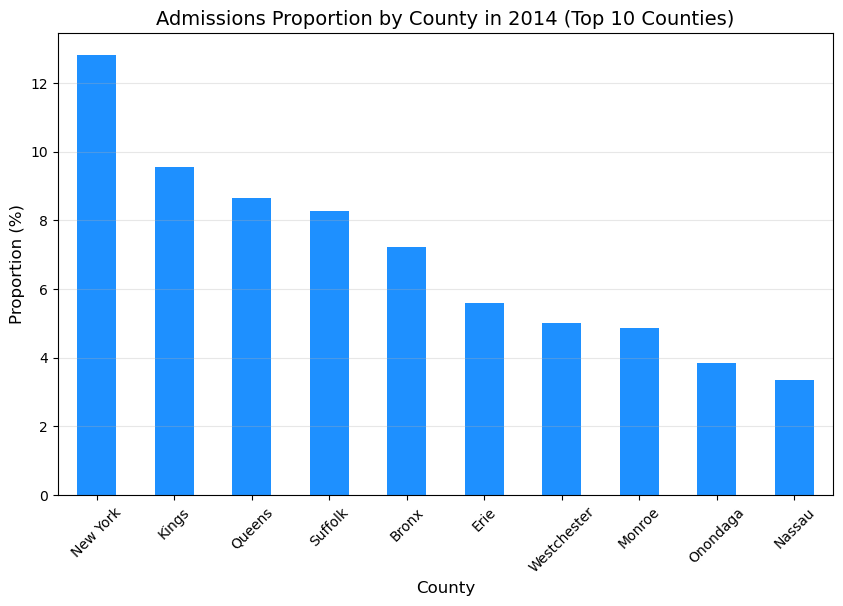

Year: 2015


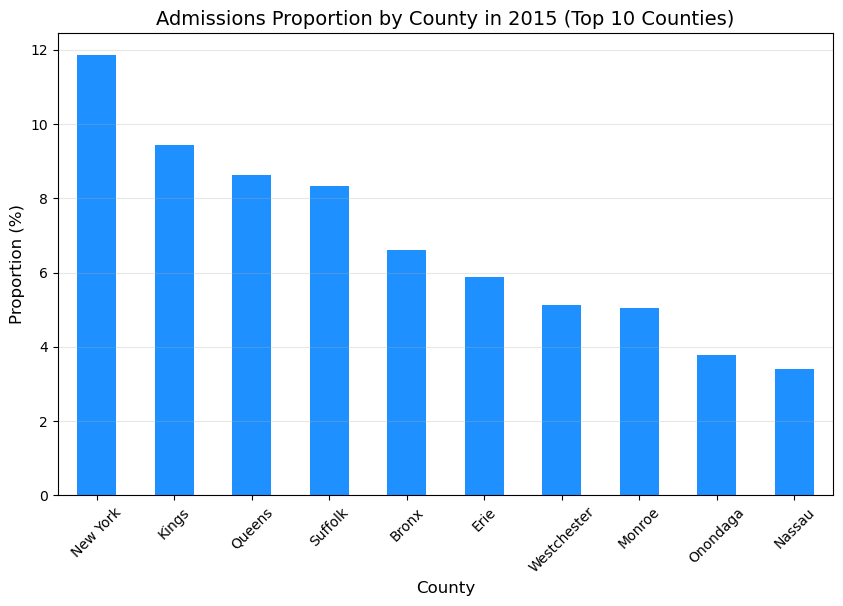

Year: 2016


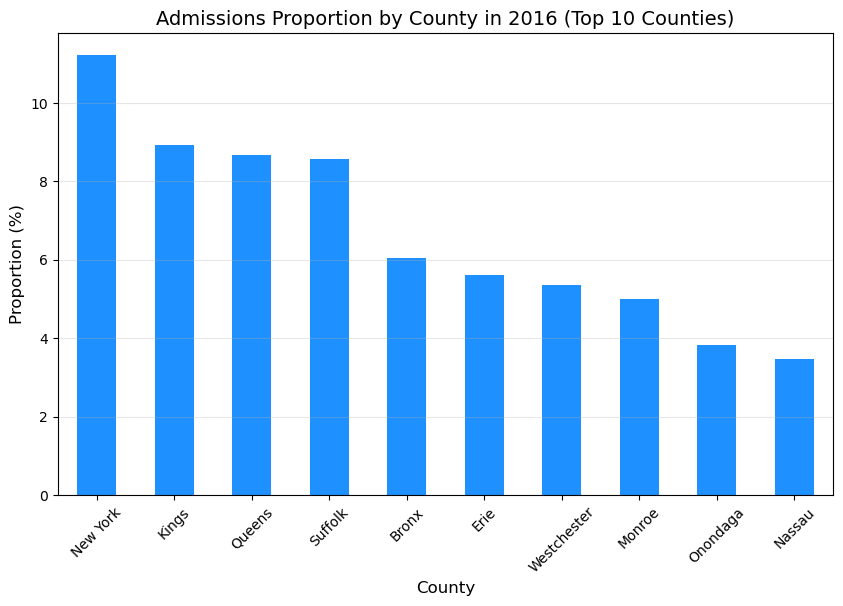

Year: 2017


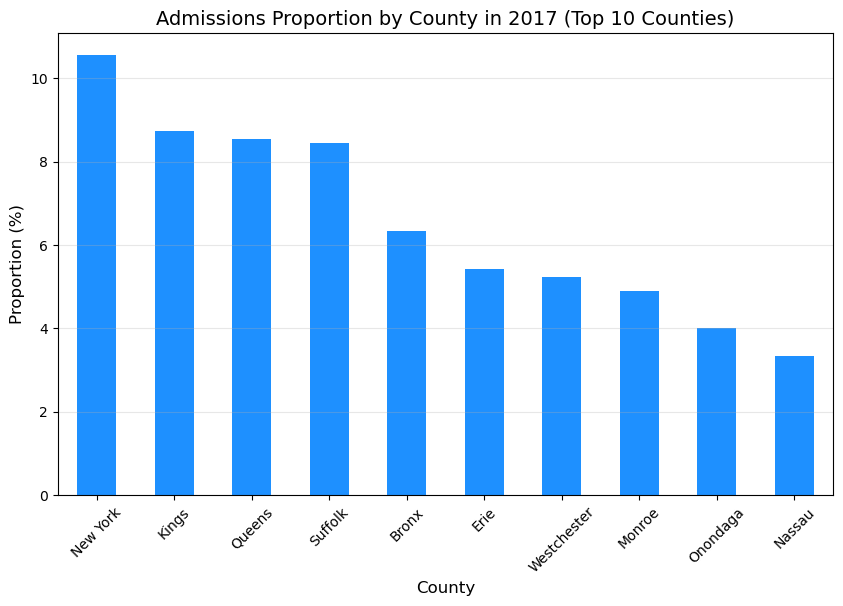

Year: 2018


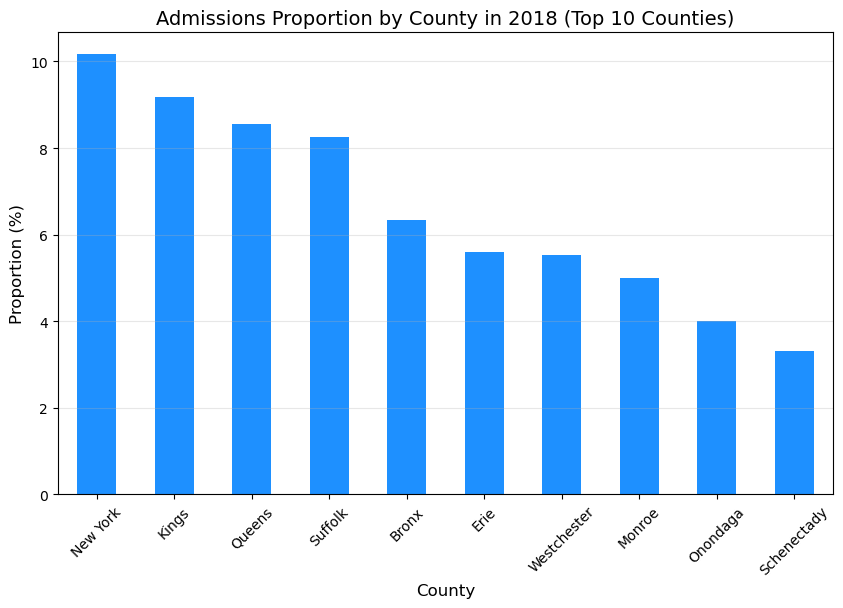

Year: 2019


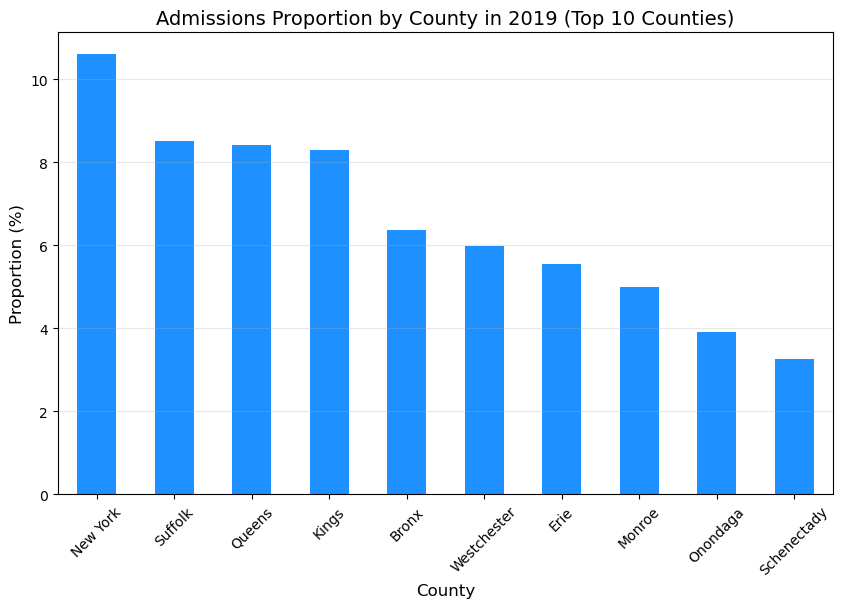

Year: 2020


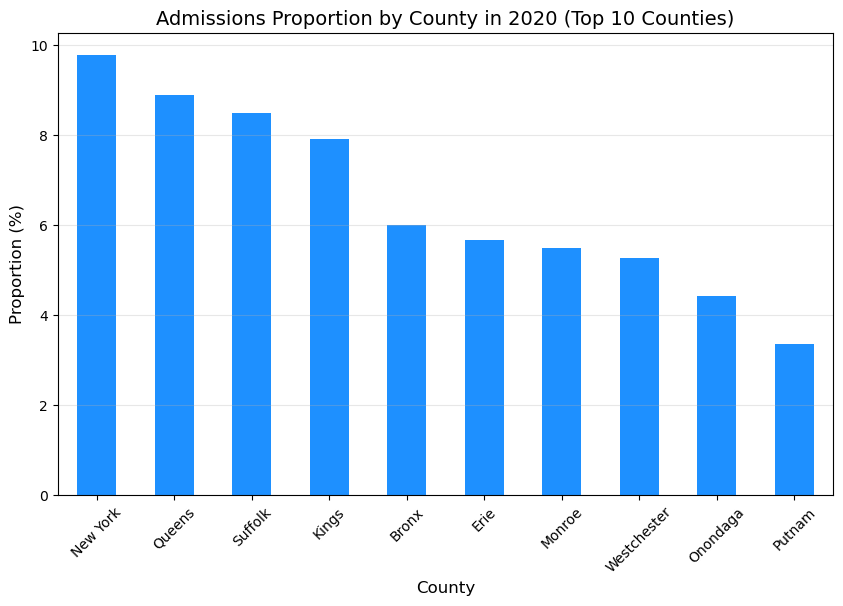

Year: 2021


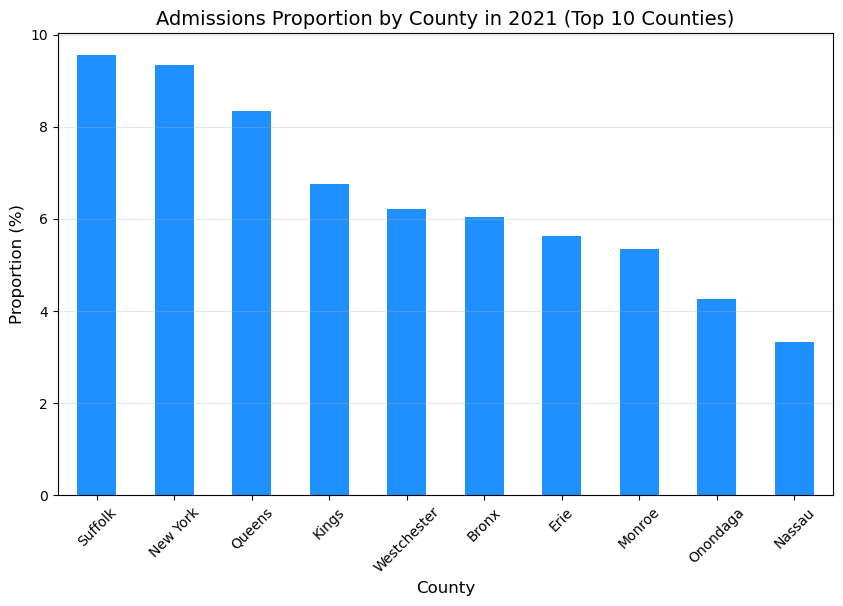

In [10]:
# Execute the function for the last 10 years in the dataset
last_10_years = sorted(admissions_df['Year'].unique())[-10:]
for yr in last_10_years:
    print(f"Year: {yr}")
    annualAdmissionsByCounty(yr, admissions_df)

**Analysis:** Using the charts above, there are a handful of trends with the percent of admissions by county over the last 10 years. Firstly, the top 5 stayed extremely consistent with New York being the largest percent, typically followed by Kings, Queens or Bronx, then Suffolk. However, in the last year and as time progresses, Suffolk slowly makes it's way to the largest percentage of admissions, being the second most common county in 2019 and the most common for admissions in 2021. The last 5 in the top 10 switch out ocassionaly, with Erie, Monroe, and Westchester being the most consistent. 

#### 6.) Filter the data, and extract all admissions to the various “Rehab” facilities; i.e. you should perform a case-insensitive match for all facilities that include the word rehab, rehabilitation, etc. Using the filtered data, identify which substance is the most prominent among each age group. Visualize and explain the results.

In [11]:
# Filter data for "Rehab" facilities
rehab_data = admissions_df[admissions_df['Service Type'].str.contains('rehab|rehabilitation', case=False, na=False)]

In [12]:
# Identify the most prominent substance for each age group
grouped = rehab_data.groupby(['Age Group', 'Primary Substance Group'], observed=True)['Admissions'].sum().reset_index()
substance_by_age = grouped.loc[grouped.groupby('Age Group', observed=True)['Admissions'].idxmax()]

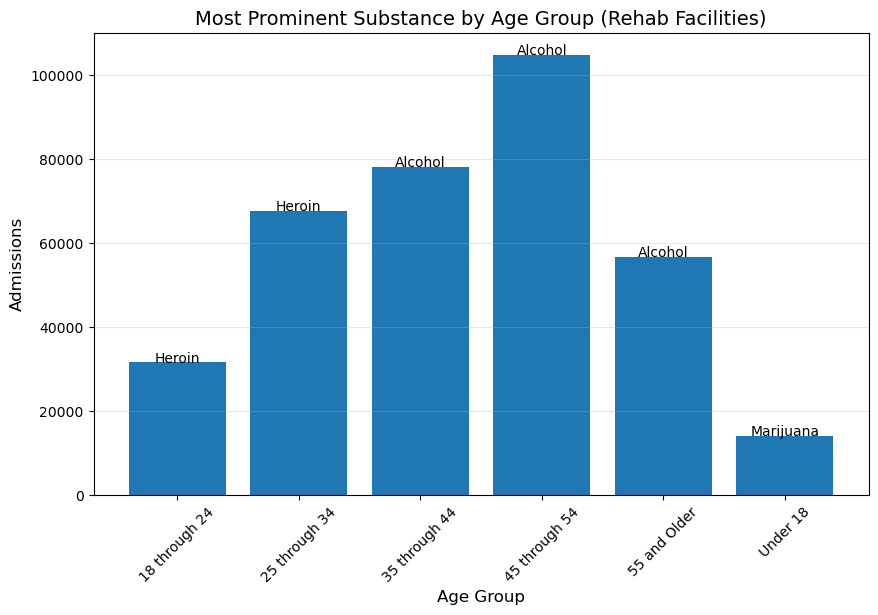

In [13]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(substance_by_age['Age Group'], substance_by_age['Admissions'])
for i, (substance, admission) in enumerate(zip(substance_by_age['Primary Substance Group'], substance_by_age['Admissions'])):
    plt.text(i, admission, f"{substance}", ha='center', fontsize=10, color='black')
plt.title('Most Prominent Substance by Age Group (Rehab Facilities)', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Admissions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

**Explanation:** The visualization above depicts the number of admissions of the most frequent substance based on age. Heroin was the most common admission from ages 18-34, while alchohol is the most common for admissions 35 and older. Marijuana was the most common for those under 18. 

#### 7.) Using the filtered “rehab” data from Question 6, conduct a detailed analysis to identify patterns in admissions to rehabilitation facilities across 7 counties. For example, are admissions for certain substance groups more prevalent etc. Provide a comprehensive explanation of your observations with supporting visualizations.

In [14]:
counties_of_interest = rehab_data['County of Program Location'].unique()[:7]  
rehab_data_7_counties = rehab_data[rehab_data['County of Program Location'].isin(counties_of_interest)]

# Group by county and substance group, and calculate total admissions
county_substance_group = rehab_data_7_counties.groupby(
    ['County of Program Location', 'Primary Substance Group'], observed=True)['Admissions'].sum().reset_index()

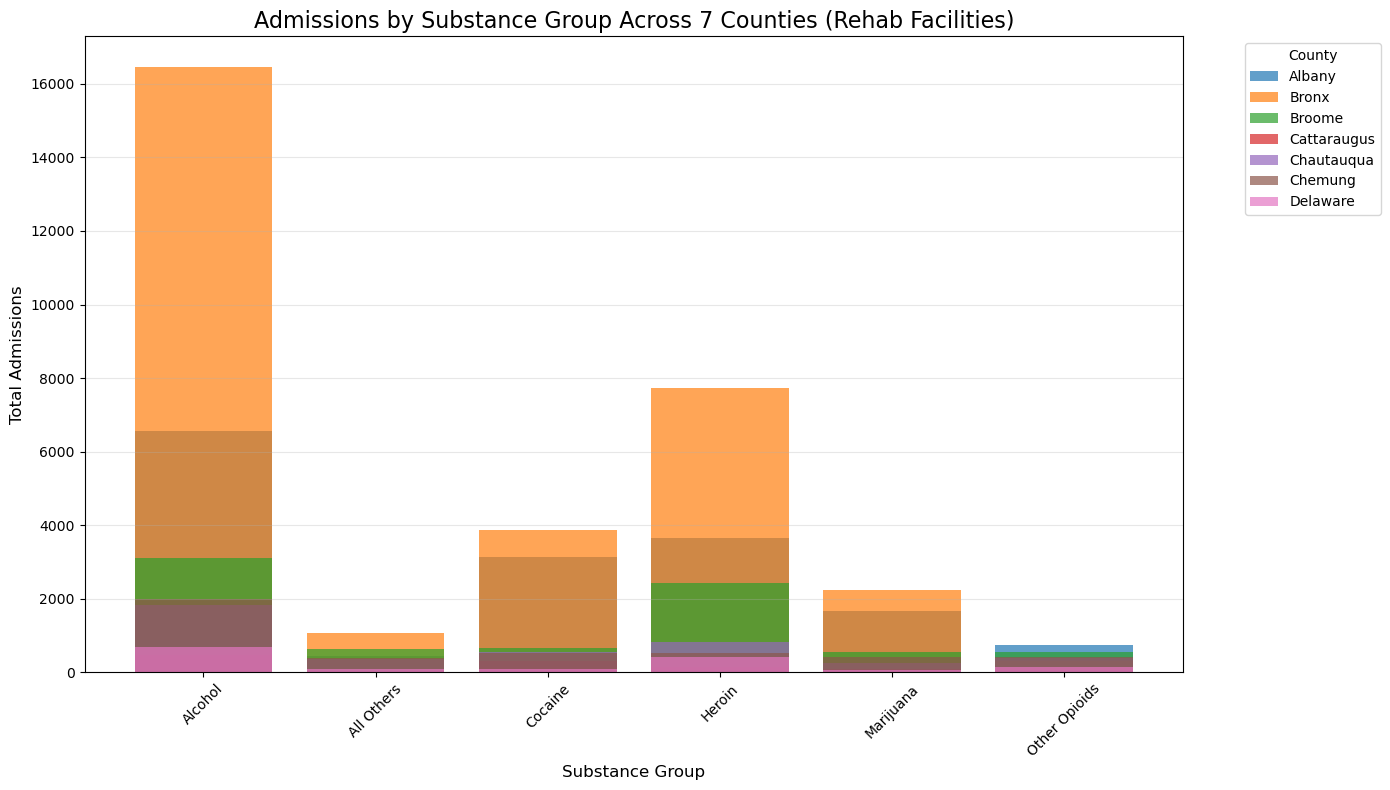

In [15]:
# Visualize the results
plt.figure(figsize=(14, 8))

# Create a bar plot for each county's substance distribution
for i, county in enumerate(counties_of_interest):
    county_data = county_substance_group[county_substance_group['County of Program Location'] == county]
    plt.bar(county_data['Primary Substance Group'], county_data['Admissions'], label=county, alpha=0.7)

plt.title('Admissions by Substance Group Across 7 Counties (Rehab Facilities)', fontsize=16)
plt.xlabel('Substance Group', fontsize=12)
plt.ylabel('Total Admissions', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Explanation:** The visualization above of rehabilitation facility admissions by substance group over time shows some clear trends in substance use treatment based on 7 counties. The chart shows that alcohol-related admissions are by far the most common across all seven counties, with the Bronx having the highest numbers. This makes it clear that alcohol dependence is a major issue compared to other substances. Heroin admissions come in second, following a similar pattern, with the Bronx leading and other counties contributing smaller numbers. Cocaine is the third most reported substance, again showing the highest admissions in the Bronx. Meanwhile, marijuana and other opioids account for the fewest admissions, suggesting they’re not as big of a factor in rehab facility intakes. The county-level differences are also pretty noticeable—while the Bronx consistently has the highest numbers across all substance groups, places like Delaware have significantly fewer admissions overall. This suggests that substance abuse challenges are more concentrated in urban areas. One thing I did notice was though the Bronx had the highest general admissions out of the 7 counties of interest, Chemung had the second most frequent admissons with very similar amounts in alchohol and cocaine, while the Bronx followed a general decrease across each category. This shows that there may be regions like Chemung that have more drug crisis than others. Additional visualizations, like a normalized bar chart or a heatmap, could help highlight trends across counties and give a better sense of how substance use patterns vary.

#### 8.) Create any (1) visualization of your choice to demonstrate something interesting about the data. Ensure that you explain what you will demonstrate and the results.

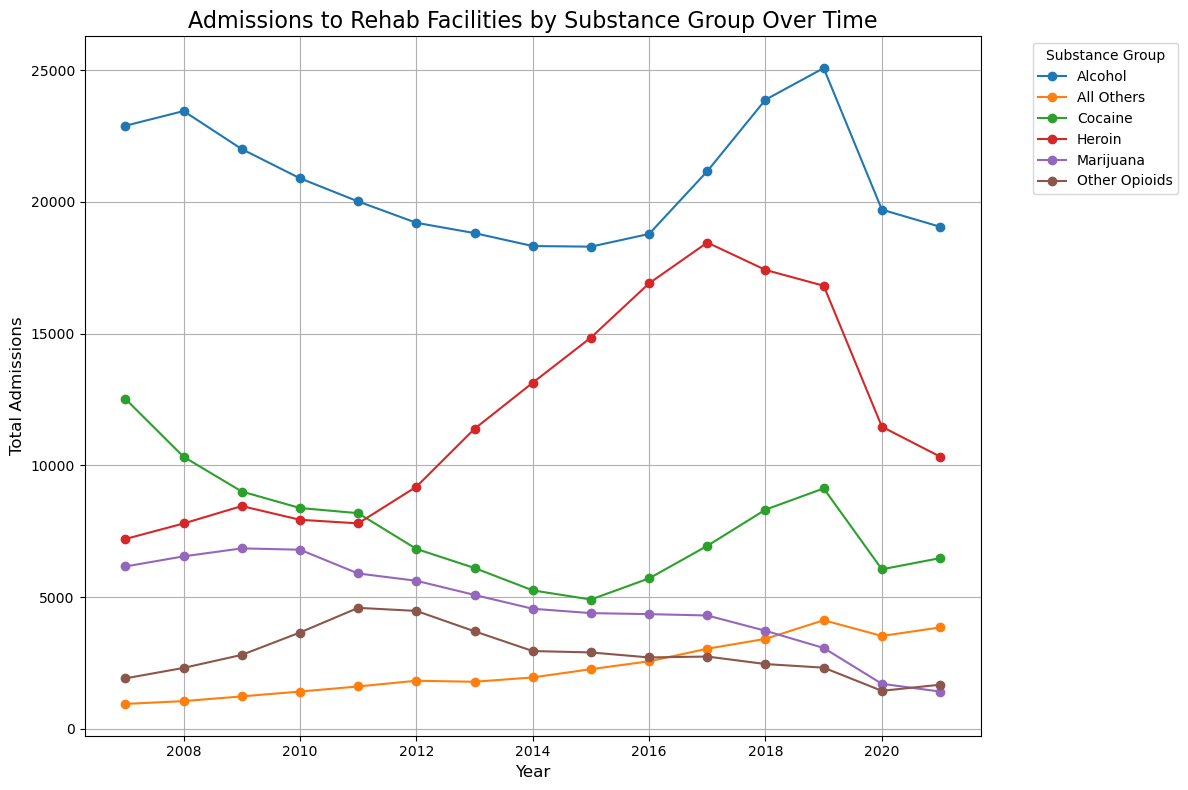

In [16]:
### Line Chart of Admissions by Substance Group Over Time

# Group the data by Year and Primary Substance Group, then sum the admissions
substance_yearly_data = rehab_data.groupby(['Year', 'Primary Substance Group'], observed=True)['Admissions'].sum().reset_index()
plt.figure(figsize=(12, 8))

# Loop through each unique substance group to plot the individual lines
for substance in substance_yearly_data['Primary Substance Group'].unique():
    # Filter the data for the current substance
    substance_data = substance_yearly_data[substance_yearly_data['Primary Substance Group'] == substance]
    # Plot the line for the current substance
    plt.plot(substance_data['Year'], substance_data['Admissions'], marker='o', label=substance)

# Labels
plt.title('Admissions to Rehab Facilities by Substance Group Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Admissions', fontsize=12)
plt.legend(title='Substance Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Explanation:** This graph shows how admissions to rehab facilities for different substance groups have changed over time. Alcohol admissions have been steadily declining since 2008, except for a noticeable spike around 2018 before dropping again. This suggests that while alcohol-related rehab admissions were initially decreasing, there may have been external factors causing a temporary rise. In contrast, heroin admissions saw a dramatic increase from around 2010 to 2017, peaking at their highest level before sharply declining after 2018. This pattern likely reflects the opioid epidemic, with increased heroin use leading to more admissions, followed by policy changes, treatment availability, or shifts to other substances affecting the numbers. Cocaine admissions show an interesting trend, with a sharp decline from 2008 to 2013, followed by a gradual increase leading up to 2018. This suggests that while cocaine use was decreasing in the early years, it may have seen a resurgence in recent years. Marijuana and "Other Opioids" admissions remain relatively low compared to alcohol and heroin but follow slightly increasing trends before declining after 2018. The "All Others" category sees a slow but steady increase over time, possibly reflecting emerging drug trends or changes in classification. Overall, the major takeaway is the sharp rise and fall of heroin admissions, the long-term decline in alcohol-related cases, and the fluctuating trends in cocaine and other substances. The large general decrease in 2020 is likely due to outside forces like the COVID-19 pandemic as previously mentioned. 